In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

In [2]:
# European bank data
df = pd.read_csv('./data/bank-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


1. You need domain experience in unsupervised learning
2. EDA is very important and visualization will help to understand the features

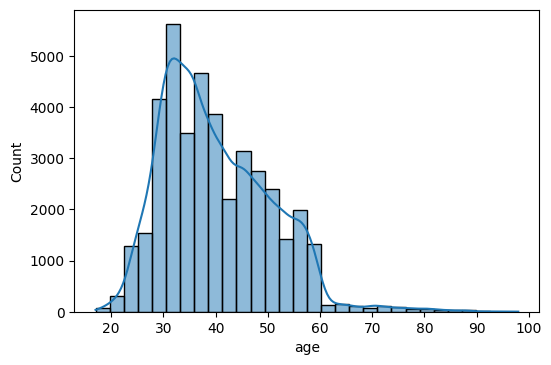

In [7]:
plt.figure(figsize=(6,4), dpi=100)
sns.histplot(data=df, x='age', kde=True, bins=30);

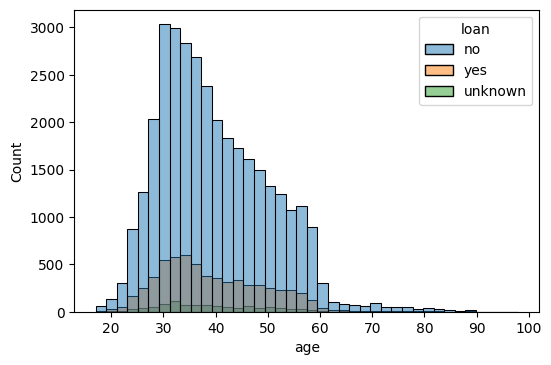

In [8]:
plt.figure(figsize=(6,4), dpi=100)
sns.histplot(data=df, x='age', bins=40, hue='loan');

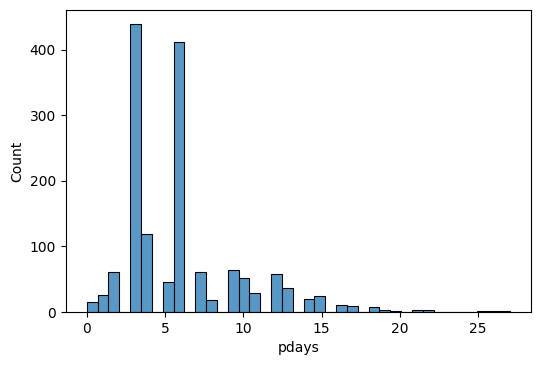

In [9]:
# PDAYS
# number of days since last contact by marketing campaign: max is 999 for people who have never been contacted
plt.figure(figsize=(6,4), dpi=100)
sns.histplot(data=df[df['pdays'] != 999], x='pdays');

In [10]:
# DURATION
# How long did contact with customer last?
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [12]:
# time of contact in seconds
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

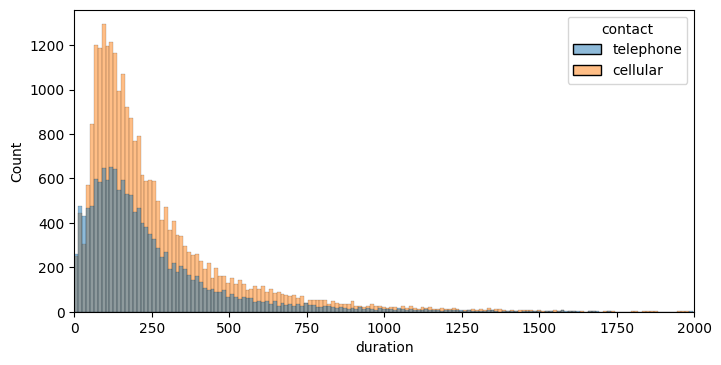

In [14]:
plt.figure(figsize=(8,4), dpi=100)
sns.histplot(data=df, x='duration', hue='contact')
plt.xlim(0, 2000)

plt.show()

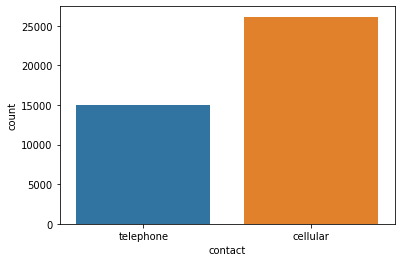

In [15]:
sns.countplot(data=df, x='contact');

In [18]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

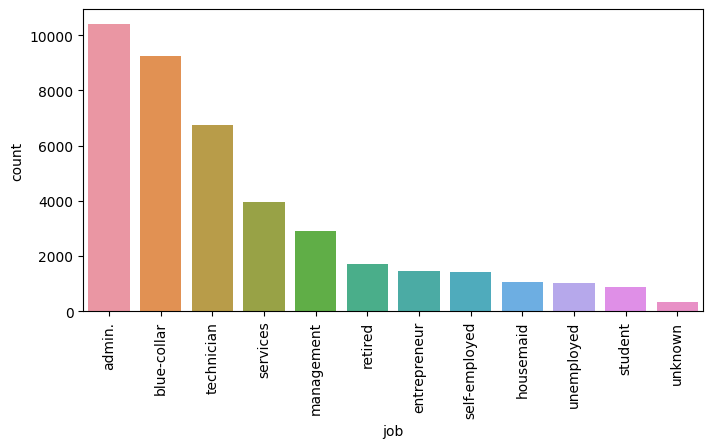

In [19]:
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(data=df, 
              x='job', 
              order=df['job'].value_counts().index)
plt.xticks(rotation=90)

plt.show()

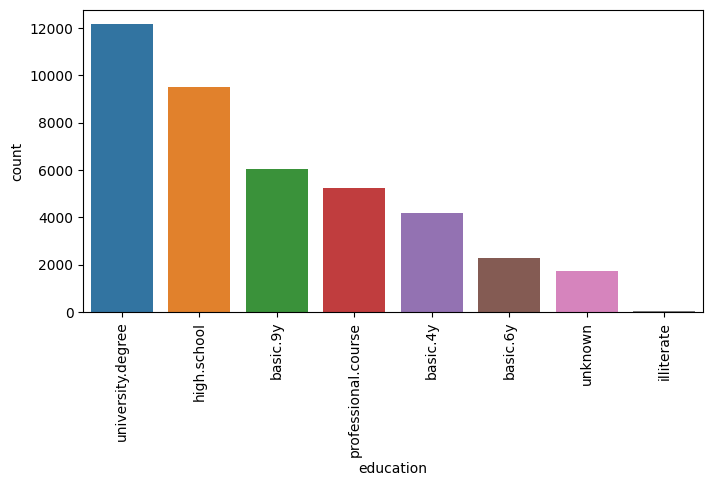

In [20]:
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(data=df, 
              x='education', 
              order=df['education'].value_counts().index)
plt.xticks(rotation=90)

plt.show()

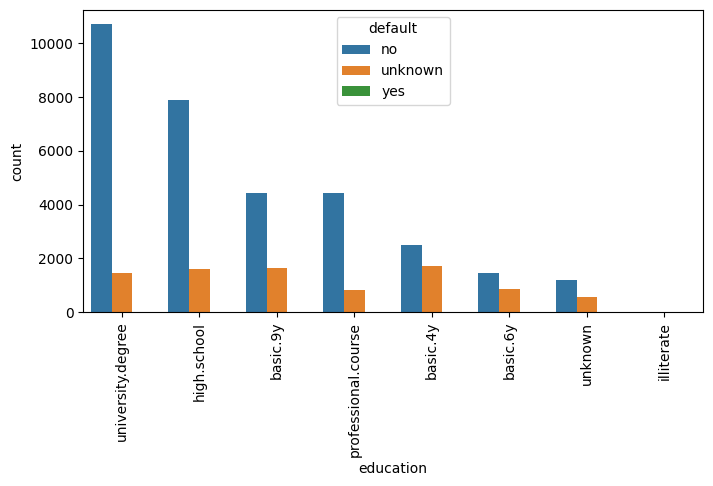

In [21]:
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(data=df, 
              x='education', 
              order=df['education'].value_counts().index,
              hue='default')
plt.xticks(rotation=90)

plt.show()

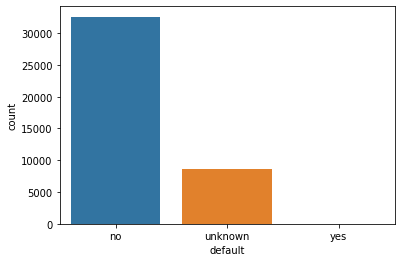

In [22]:
sns.countplot(data=df, x='default');

In [24]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [25]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [26]:
# select the subset of features you want to see before running this command on the full DataFrame
# sns.pairplot(df);  

### How do we handle categorical data for clustering?

In [28]:
X = pd.get_dummies(df)  # we do not need to drop first because this isn't supervised learning!
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [32]:
# notice the difference here from supervised learning: we do NOT need to split the data and only fit to X_train here
X_scaled = scaler.fit_transform(X)

In [33]:
from sklearn.cluster import KMeans

In [34]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

_Important parameters of KMeans() to note:_
* n_clusters: the K-value to specify (MOST IMPORTANT)
* custom initialization
* random_state: set a seed for random initialization
* max_iter: max number of iterations

In [35]:
K = 2
model = KMeans(n_clusters=K)

In [41]:
# fit, fit_predict, predict

# Do two things at once:
#   1. fit the data and 
#   2. return the cluster labels
cluster_labels = model.fit_predict(X_scaled)
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
X['cluster'] = cluster_labels
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0


How do we know that K=2 was a good choice?

In [47]:
# check correlation with the cluster assignment
X.corr()['cluster'].iloc[:-1].sort_values()

previous               -0.478467
poutcome_failure       -0.464295
contact_cellular       -0.410476
month_apr              -0.357923
subscribed_yes         -0.294610
                          ...   
poutcome_nonexistent    0.544377
cons.price.idx          0.679372
nr.employed             0.886155
emp.var.rate            0.932612
euribor3m               0.959297
Name: cluster, Length: 65, dtype: float64

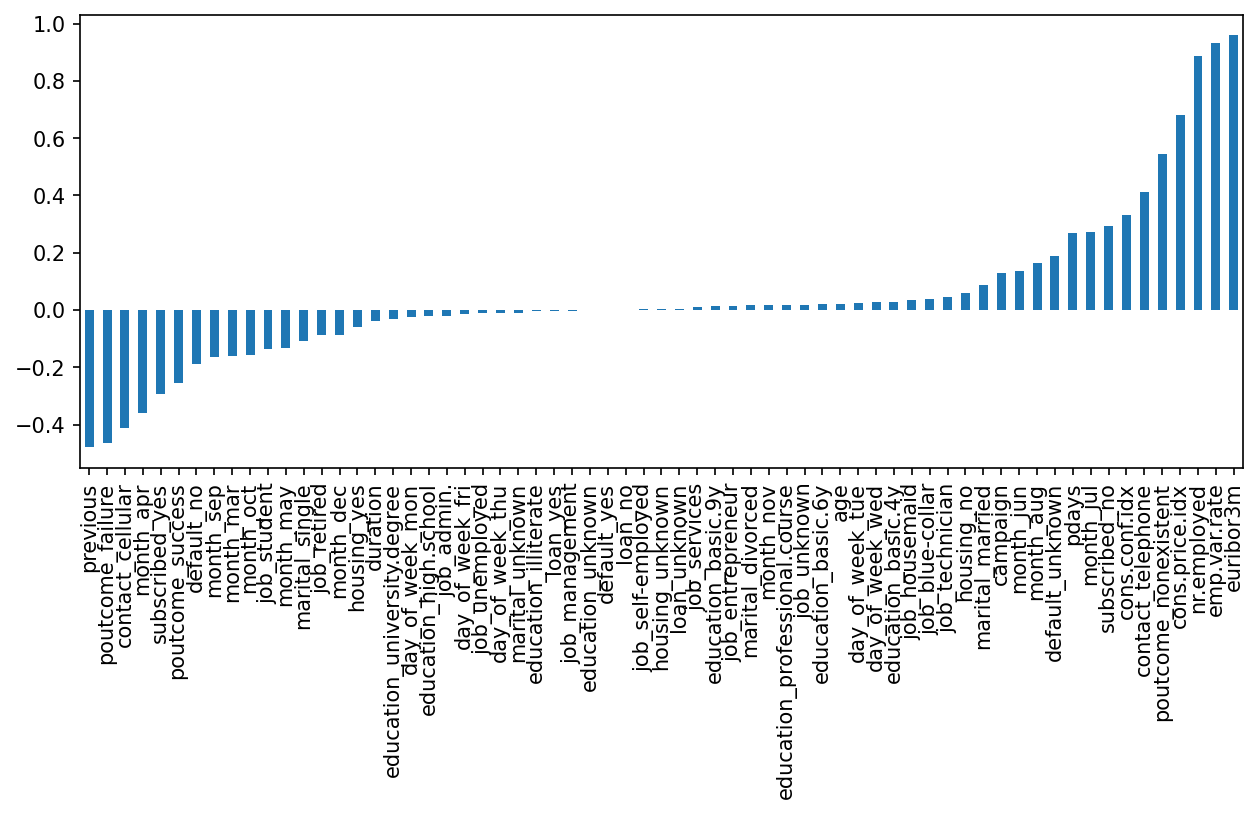

In [50]:
plt.figure(figsize=(10,4), dpi=150)
X.corr()['cluster'].iloc[:-1].sort_values().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

### Elbow Method

In [52]:
ssd = []
Kmax = 9

for K in range (2, Kmax+1):
    
    # KMeans model using new K value
    model = KMeans(n_clusters=K)
    model.fit(X_scaled)
    
    # measure of how far each point is from the cluster center
    ssd.append(model.inertia_)

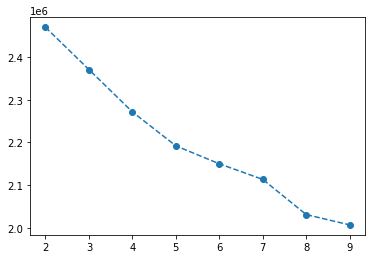

In [53]:
plt.plot(range(2, Kmax+1), ssd, 'o--')
plt.show()

In [54]:
pd.Series(ssd)

0    2.469792e+06
1    2.370787e+06
2    2.271503e+06
3    2.192021e+06
4    2.149930e+06
5    2.113268e+06
6    2.030896e+06
7    2.006763e+06
dtype: float64

In [55]:
pd.Series(ssd).diff()

0             NaN
1   -99005.805827
2   -99283.078967
3   -79482.164147
4   -42091.391641
5   -36661.595957
6   -82371.961678
7   -24133.647742
dtype: float64